# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/survey'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'survey'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,What_is_your_age_,What_is_your_sex_,How_difficult_was_the_paper_based_assessment_,How_difficult_was_the_software_assessment_,How_intuitive_was_the_software_assessment_compared_to_the_paper_test_,How_comfortable_were_you_navigating_through_the_software_,How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_,How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_,Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_,Would_you_recommend_this_assessment_to_someone_else_,Would_being_able_to_take_this_test_remotely_help_your_care_,Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_,Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_,What_changes_did_you_make_after_taking_the_test_,Would_you_trust_the_results_of_this_test_,What_impact_do_you_see_this_having_on_your_quality_of_life_,What_impact_do_you_see_this_having_on_your_quality_of_care_
0,48,Male,3.0,3.0,5.0,4,5,3,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Minimal because I’ve been evaluated multiple t...,Not relevant right now due to my current cogni...
1,48,Male,3.0,3.0,5.0,4,5,3,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Minimal because I’ve been evaluated multiple t...,Not relevant right now due to my current cogni...
2,27,Male,3.0,1.0,4.0,5,5,5,Yes,Yes,Yes,Yes,Yes,"Exercise, Financial Planning, Healthier diet",Yes,I can make changes to my life style to improve...,Now I know what I need to look for In my care
3,33,Female,1.0,2.0,4.0,4,4,5,Yes,Yes,Yes,Yes,Yes,Cognitive activities,Yes,A better understanding of my health and ideas ...,More confidence in having been assessed accura...
4,83,Male,2.0,3.0,3.0,3,3,4,NaN,Yes,Yes,Yes,Yes,NaN,Yes,Good to know I am OK,Not receiving care right now
5,39,Male,2.0,3.0,3.0,5,4,5,Yes,Yes,Yes,Yes,Yes,"Financial Planning, Cognitive activities",Yes,Taking the test regularly can definitely assis...,It would help health care providers better und...
6,46,Female,NaN,NaN,NaN,4,4,5,Yes,Yes,Yes,No,No,NaN,NaN,NaN,NaN
7,50,Female,3.0,1.0,5.0,5,5,5,Yes,Yes,Yes,Yes,Yes,"Exercise, Healthier diet, Cognitive activities",Yes,Depends on the situation. If someone is relian...,"If a person needs homecare, the quality of car..."
8,71,Male,4.0,4.0,4.0,5,4,2,Yes,Yes,Yes,Yes,Yes,NaN,Yes,No effect at this time,No impact at this time
9,83,Female,2.0,4.0,4.0,3,5,4,Yes,Yes,Yes,Yes,Yes,"Exercise, Cognitive activities",Yes,Being aware of dementia symtoms,Family would be more aware of what care is ava...


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [156]:
data_df.columns

Index(['Unnamed__0', 'Disease_Status', 'Simplified_Disease_Status', 'PTID',
       'SITEID', 'VISCODE', 'USERDATE', 'EXAMDATE', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'TOTAL11',
       'TOTALMOD', 'subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumGM',
       'CerebellumWM', 'FrontalSurface', 'FrontalCSF', 'FrontalGM',
       'FrontalWM', 'InsularSurface', 'InsularCSF', 'InsularGM', 'InsularWM',
       'MTLSurface', 'MTLCSF', 'MTLGM', 'MTLWM', 'OccipitalSurface',
       'OccipitalCSF', 'OccipitalGM', 'OccipitalWM', 'ParietalSurface',
       'ParietalCSF', 'ParietalGM', 'ParietalWM', 'TemporalSurface',
       'TemporalCSF', 'TemporalGM', 'TemporalWM', 'SubcortexSurface',
       'SubcortexSurfaceVentricle', 'SubcortexCSF', 'SubcortexGM',
       'SubcortexWM', 'WholeBrainSurface', 'WholeBrainCSF', 'WholeBrainGM',
       'WholeBrainWM', 'temp_ins_csf', 'temp_ins_gm', 'temp_ins_wm',
       'temp_ins_surface', 'frontal', 'temporal', 'par

In [ ]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [157]:
data_df.columns

Index(['Unnamed__0', 'Disease_Status', 'Simplified_Disease_Status', 'PTID',
       'SITEID', 'VISCODE', 'USERDATE', 'EXAMDATE', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'TOTAL11',
       'TOTALMOD', 'subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumGM',
       'CerebellumWM', 'FrontalSurface', 'FrontalCSF', 'FrontalGM',
       'FrontalWM', 'InsularSurface', 'InsularCSF', 'InsularGM', 'InsularWM',
       'MTLSurface', 'MTLCSF', 'MTLGM', 'MTLWM', 'OccipitalSurface',
       'OccipitalCSF', 'OccipitalGM', 'OccipitalWM', 'ParietalSurface',
       'ParietalCSF', 'ParietalGM', 'ParietalWM', 'TemporalSurface',
       'TemporalCSF', 'TemporalGM', 'TemporalWM', 'SubcortexSurface',
       'SubcortexSurfaceVentricle', 'SubcortexCSF', 'SubcortexGM',
       'SubcortexWM', 'WholeBrainSurface', 'WholeBrainCSF', 'WholeBrainGM',
       'WholeBrainWM', 'temp_ins_csf', 'temp_ins_gm', 'temp_ins_wm',
       'temp_ins_surface', 'frontal', 'temporal', 'par

Set the parameters for dropping rows

In [188]:
column = 'Disease_Status'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'MCI' # The value to drop if found

In [189]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Unnamed__0,Disease_Status,Simplified_Disease_Status,PTID,SITEID,VISCODE,USERDATE,EXAMDATE,Q1,Q2,...,InsularComp,ins_temp_comp,Occipital_CSF_CT,Frontal_CSFCT,Parietal_CSFCT,Temp_Ins_CSFCT,Occipital_CSFWM,Frontal_CSFWM,Parietal_CSFWM,temp_ins_CSFWM
0,7,Alzheimer,Impaired,002_S_0816,101,bl,8/20/14,9/11/06,5.00,0,...,311.452855,6933.070971,5436.106960,3947.132871,4499.237484,4074.434073,5019.777225,2700.814022,3875.731952,3684.448375
1,30,Normal,Normal,002_S_4270,1,bl,11/1/11,NaN,3.00,0,...,275.447555,3562.008959,1301.960326,2785.119664,3800.683345,973.207981,990.895111,1637.164813,2946.479351,507.083171
3,5,Alzheimer,Impaired,005_S_0929,1,bl,8/20/14,11/8/06,3.67,0,...,975.798354,19486.427650,8458.827465,9494.111368,8796.034836,11221.848900,7891.875474,8665.719617,8292.681593,10213.815940
4,29,Alzheimer,Impaired,006_S_4192,4,bl,10/6/11,10/24/11,5.00,0,...,747.689688,15651.868820,2117.386538,13638.670480,9070.300757,8042.537350,1739.710979,11818.296000,8245.254295,6124.353807
5,23,Normal,Normal,007_S_0068,2,bl,8/20/14,12/15/05,1.00,0,...,829.361130,5643.843563,2018.965274,5597.859261,5060.115192,2800.667895,1227.372700,4779.727441,3824.989830,2268.668097
6,21,Normal,Normal,007_S_0101,2,bl,8/20/14,1/4/06,4.00,0,...,1538.179599,13270.120870,4731.251801,17111.916220,7702.427700,9165.537956,4621.310551,16548.242340,7153.971884,8862.569283
10,41,Normal,Normal,013_S_4580,10,bl,4/26/12,NaN,2.00,0,...,528.616672,4728.347188,1404.515689,3943.082686,2680.745001,1535.057475,936.103696,2507.496906,2169.864687,1162.896979
11,13,Normal,Normal,014_S_0558,110,bl,8/20/14,7/6/06,3.67,0,...,1071.961873,17597.029900,8154.158941,10796.953300,13884.577160,12888.655900,7748.400011,10296.108700,13458.198130,12602.958710
13,32,Normal,Normal,018_S_4313,13,bl,11/30/11,NaN,5.00,0,...,131.313291,2855.701613,1463.353062,4430.094302,1554.114422,1017.156778,678.895357,3098.649812,806.617851,420.852789
14,33,Normal,Normal,019_S_4367,59,bl,12/5/11,11/26/12,2.00,0,...,80.620220,3513.710066,297.851102,2554.104115,824.695238,839.006701,97.702920,2185.262941,572.043401,504.526495


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Compare Central Tendencies Across Multiple Groups within a Supergroup

In [ ]:
data_df.columns


Select Columns

In [ ]:
data_df = data_df.loc[:, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q14', 'TOTAL11', 'TOTALMOD']]

Alter Dataframe columns

In [ ]:
import numpy as np
data_df['Disease_Status'] = np.where(data_df['Disease_Status'] == 'Normal', 'Normal', 'Impaired')
data_df

Melt the Dataframe

In [ ]:
import pandas as pd

def melt_dataframe(df, var_name='group', value_name='value'):
    """
    Melts a wide-format DataFrame into a long format.

    Parameters:
    df (DataFrame): The wide-format DataFrame to be melted.
    var_name (str): The name to be given to the 'variable' column in the melted DataFrame.
    value_name (str): The name to be given to the 'value' column in the melted DataFrame.

    Returns:
    DataFrame: The melted long-format DataFrame.
    """
    melted_df = df.reset_index().melt(id_vars='index', var_name=var_name, value_name=value_name)
    melted_df = melted_df.drop(columns='index')  # Remove the 'index' column if not needed
    return melted_df


In [ ]:
value = 'score'
variable = 'question'

In [ ]:
melted_df = melt_dataframe(data_df, var_name=variable, value_name=value)

Normalize Data if Desired

# Plot Violin Plots for Each Group Across Categories
plot_violin_strip(data, 'x_col', 'y_col', 'hue_col', dodge=True, adjust_condition=None)


This function generates a combined plot of violin and strip plots to visualize the distribution of a continuous variable across different categories. The DataFrame is expected to have columns for x-axis categories (x_col), y-axis values (y_col), and grouping variable (hue_col).

In [4]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin_strip_combined(data, factors, group_col, out_dir=None):
    """
    Plot violin and strip plots for multiple factors in the same plot, distinguishing between groups.
    
    Parameters:
        data (DataFrame): Input DataFrame containing the data.
        factors (list of str): List of columns in the DataFrame to plot.
        group_col (str): Name of the column for grouping (e.g., 'Alzheimer' vs. 'Control').
    """
    # Melt the DataFrame from wide to long format
    long_df = pd.melt(data, id_vars=[group_col], value_vars=factors, var_name='Factor', value_name='Value')
    
    # Initialize the matplotlib figure
    if len(factors) < 3:
        length = 6
    else:
        length = 1.3*(len(factors))
    plt.figure(figsize=(length, 6))
    sns.palette = 'tab10'
    
    # Plot violin plot
    sns.violinplot(x='Factor', y='Value', hue=group_col, data=long_df, dodge=True, palette='tab10', cut=.0010)
    
    # Add strip plot on top of the violin plot to show individual data points
    sns.stripplot(x='Factor', y='Value', hue=group_col, data=long_df, dodge=True, size=5, marker='o', edgecolor='k', linewidth=1, facecolors='none', legend=False)
    
    sns.despine()
    
    # Improve the legend
    plt.legend(title=group_col, loc=2)
    
    # Set titles and labels
    plt.title('Distribution of Factors by Group')
    plt.xlabel('Factors')
    plt.ylabel('Values')

    plt.tight_layout()
    if out_dir is not None: 
        plt.savefig(os.path.join(out_dir, 'central_tendency_plot.svg'))
        print("Saved to: ", out_dir)
    plt.show()
    


In [5]:
data_df.columns

Index(['What_is_your_age_', 'What_is_your_sex_',
       'How_difficult_was_the_paper_based_assessment_',
       'How_difficult_was_the_software_assessment_',
       'How_intuitive_was_the_software_assessment_compared_to_the_paper_test_',
       'How_comfortable_were_you_navigating_through_the_software_',
       'How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_',
       'How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_',
       'Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_',
       'Would_you_recommend_this_assessment_to_someone_else_',
       'Would_being_able_to_take_this_test_remotely_help_your_care_',
       'Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_',
       'Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_',
       'What_changes_did_you_make_after_taking_the_test_',
       'Would_you_t

In [7]:
factors = ['What_is_your_age_']
group_col = 'What_is_your_sex_'

Plot

Saved to:  /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/survey


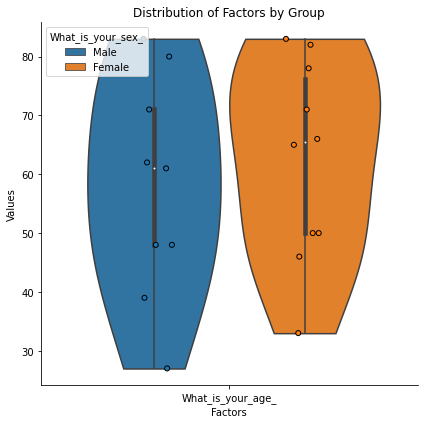

In [8]:
plot_violin_strip_combined(data_df, factors, group_col, out_dir=out_dir)